# Late Payment Classifier Model

**Name:** Classification for Late Payment of Property Tax Payers   
**Last Modified Date:** Jul 27, 2023   
**Authors:** Shashank Parameswaran, Tinh Cao, Chris Chen, Sohail Syed, Zainab Hasnain    
**Organization:** Illinois Institute of Technology   
(C) All Rights Reserved

In [1]:
# Import the LatePaymentClassifier module
from LatePaymentPackage import LatePaymentClassifier

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/27 18:34:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Set your dataset directory here
# If you have your datasets in different folders, you can skip this cell and enter the directories in the below cell manually for each file
datasetDirectory = "yourDatasetDirectory/Datasets/"

In [3]:
# Initialize the object with the file names
# If your datasets are in different categories, provide the path directly seperated by / for each of the below files
# if you need predictions for 2022, file1 should start from 2018
# similarly, next year, when you need predictions for 2023, file1 should start from 2019

lpc = LatePaymentClassifier(
                         file1 = datasetDirectory+"2018.rpt", # Year1 Property Master data-"Directory/Datasets/2017.rpt
                         file2 = datasetDirectory+"2019.rpt", # Year2 Property Master data
                         file3 = datasetDirectory+"2020.rpt", # Year3 Property Master data
                         file4 = datasetDirectory+"2021.rpt", # Year4 Property Master data
                         fileCurrentYear = datasetDirectory+"2022.rpt", # Current Year data - to be predicted
                         fileHeader = datasetDirectory+"Header.rpt",  # Header file for property master
                         fileDueDates = datasetDirectory+"InstDates.csv", # Updated Tax Due dates csv file
                         pmtFile1 = datasetDirectory+"TY2018.rpt", # Year1 Payment Master data
                         pmtFile2 = datasetDirectory+"TY2019.rpt", # Year2 Payment Master data
                         pmtFile3 = datasetDirectory+"TY2020.rpt", # Year3 Payment Master data
                         pmtFile4 = datasetDirectory+"TY2021.rpt", # Year4 Payment Master data
                         pmtCurrentYear = datasetDirectory+"TY2022.rpt", # Current Year payment master data
                         currentYear = 2022 # Enter the current year, ie, TaxYear for which you need the predictions
                         )


In [4]:
# Run Data Transformation and Model
lpc.readData()
lpc.simpleTransform()
lpc.woeTransform()
lpc.windowTransform()
lpc.otherTransform()
lpc.trainTestSplit()
lpc.fit()
lpc.getFeatureImportance()
print("Model has been executed!")

Reading Data.....


Initial property master dataset size: [9325560, 81]
Running simple transformations.....


Dataset size after simple transformation: [4365468, 37]
Running WOE transformations.....


Dataset size after WOE Transformation: [4365468, 37]
Running window transformations.....


Dataset size after window transformation: [4365468, 40]
Running few other transformations.....


Dataset size for model building: [4365468, 29]
Splitting into train and test data.....


Dataset size for training: [3434062, 29]


Dataset size for testing: [931406, 29]
Fitting the model.....


Retreiving the most important features.....
Model has been executed!


# Output
- Export predictions to CSV
- Enter the directory where the CSV file should be created with the path seperated by /

In [ ]:
lpc.exportToCSV("yourDirectory/Predictions.csv")

# Other Actions
**Note:**
- Shows the results - Accuracy, F1 Score, Recall and Precision
- These commands only work when you provide fileCurrentYear with the updated LastPaymentDate2 dates for installment 2
- These commands can be used next year to evaluate the model and compare the results. For the current year, we have already provided the results in the deck
- While running these commands next year (ie, when you have the updated LastPaymentDate2 field for 2022 TaxYear), file 1 should start from 2018

In [ ]:
lpc.getResults()
lpc.results

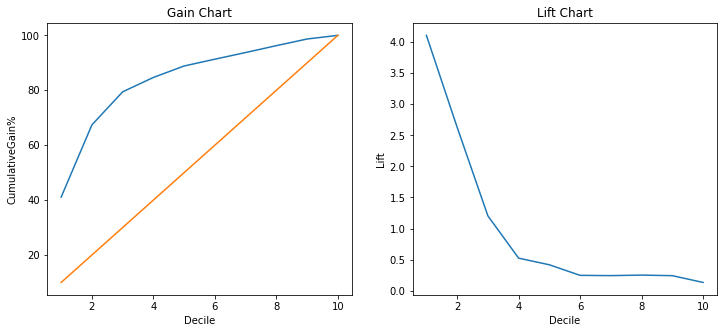

In [7]:
# Plot the Gain Lift chart
lpc.getGainLiftChart()
lpc.plotGainLiftChart()